In [19]:
from wordcloud import WordCloud

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [48]:
def LZCompress(katar):
    i, k = 0, 2
    n = len(katar)
    tmparray = []
    tmp = ""
    _tmp=""
    G = nx.DiGraph()    
    while True:
        if i >= n:
            if tmp:
                tmparray.append(tmp)
                G.add_edge(_tmp,tmp)
            break
        if katar[i] is tmp:
            tmp = tmp + katar[i]
            i += 1
            continue
        tmp = tmp + katar[i]
        if not tmp in tmparray:
            tmparray.append(tmp)
            if _tmp:
                G.add_edge(_tmp,tmp)
            _tmp=tmp
            tmp = katar[i]
        i += 1
    return tmparray,G

In [42]:
rawDf = pd.DataFrame(columns=['sequance', 'control'])

In [43]:
'''
rawDf = pd.DataFrame(columns=['sequance', 'control'])
file = "sampled.all"
with open(file,"r") as f:    
    while True:
        line1 = f.readline()
        line2 = f.readline()
        line3 = f.readline()
        line4 = f.readline()
        if not line1:
            break
        rawDf = rawDf.append({"sequance":line2.rstrip(), "control":line4.rstrip()}, ignore_index = True)        
rawDf.to_csv("sample.csv")
rawDf.info()
'''

In [44]:
rawDf=pd.read_csv("sample.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92419 entries, 0 to 92418
Data columns (total 2 columns):
sequance    92419 non-null object
control     92419 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [45]:
sequance=''.join(rawDf["sequance"])
control=''.join(rawDf["control"])

In [46]:
print(len(sequance),len(control))

17371538 17371538


In [2]:
#dnaHomoSapiens="GACCTATATTGCCGCTGATGAAGCGACAAAACAGGCGATGGTGGAAGTGGTCTATGGCCGCTCCCTCTATGCCGGGGCGGCTCACGGGCCGTCGCCTACCGGTAATCCCAGGGCATTGATCATTGGCAGCCNNNNNNNNNNNNGNTGGACAGGGTTACGGGCGATATCCAGCACGGCGTCGGTAAAGGCGTTGCAGGCGGTGGAGCATCGTGGCGTCGATAGCAACTGGCTGGCCGTTCTTGTCAGCGTGGTCGCGCTGACTATCCTGGGCATTACTCTGCTGGTTTCTTTATTTGCGTCATTAACGGCTTTAAAGCCATCCAGATCCATAAACAGTAGCGCGAAAGACGTGCCTTCCCGATTCGCTTTGCTGATGGCCTGTTCCAGACGATCCT"
#control="AAGGGAGGIIIIIIIIIIIGGIIIIIIIIIGIIIIIIGIIIIIIIIIIIGIGIGIIIIIIIIIIIIIIIIIIIIGIIIIIGIIIIIIGGGIGIIGIIIIIIAGAGGIIIIIIIIGIIIGIGIIIIIIIIII############<#<<GGIGIGIIIIIIIIIIGIIIIIIIGIGGGIIIIIIIIGIIIIIIIIIIIIGIIGIGGIIGGIGGIIGGGGGGGGAGGGGGGGGGGGGGGIIIGGGIIGGIGGAGIGGGI<GGGIGGGGGIGIGGAGGGIAGIGGIGGGIIIGGGGGGI<GAGAGGGIIIIIIIIIGGG.GGGGIGGIGGGGIIIGGIIGGGGIIGGIIGGIIGGGGGGIIGGIIIGGIGIIIIIGAGGGGGGGGGGGGGGIIIGGGGG"

Örüntülerin DNA sequance ından çıkarılması

In [ ]:
xx, G = LZCompress(sequance)
nx.write_gml(G, "sequance.gml")
maxLenght=len(max(xx, key = len))
d={}

In [ ]:
Örüntülerden en uzununun karakter sayısı

In [ ]:
maxLenght

In [5]:
dd=[]
for i,c in enumerate(control):    
    if i == 0:
        continue
    item=ord(control[i])
    itemBefore=ord(control[i-1])
    if item <= itemBefore:
        continue
    for j in range(maxLenght):
        if i-j>0:
            s=sequance[i-j:i]
            if len(s)>1 and  s in xx:
                dd.append({"str":s,"val":control[i-1]+control[i],
                           "valInt":item-itemBefore})

In [16]:
df=pd.DataFrame(dd)
df["strlen"]=df["str"].str.len()
df["count"]=df.groupby(["str"])["str"].transform("count")
df.head()

,str,val,valInt,strlen,count
0,TA,AG,6,2,5
1,CTA,AG,6,3,2
2,TA,GI,2,2,5
3,ATA,GI,2,3,1
4,GA,GI,2,2,7


[Text(0, 0, 'TGA'), Text(0, 0, 'CGG'), Text(0, 0, 'CGC')]

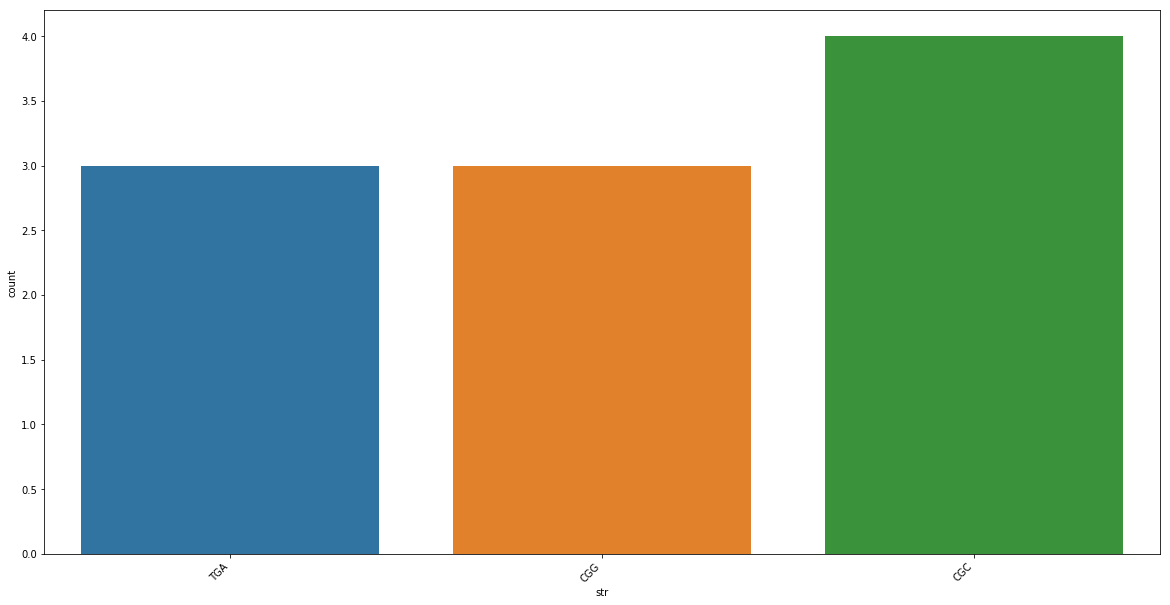

In [24]:
sc=df[df["count"]>2]
sc=sc[sc["strlen"]>2]
#sc=sc["str"].value_counts()
plt.figure(figsize=(20,10))
chart = sns.countplot(sc["str"])
chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=45, horizontalalignment='right')

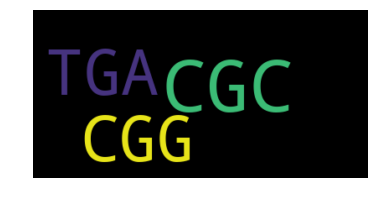

In [25]:
text = " ".join(review for review in sc["str"])
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()